In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

/opt/anaconda3/envs/nlp/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


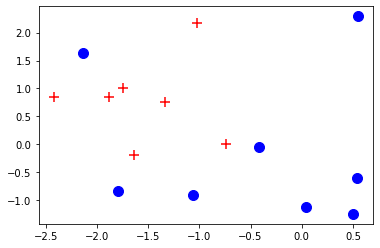

In [32]:
np.random.seed(2)
n_points = 15
X, y = make_blobs(n_points, 2, centers=[(0,0), (-1,1)])
# y[y==0] = -1       # use -1 for negative class instead of 0
plt.scatter(*X[y==1].T, marker="+", s=100, color="red")
plt.scatter(*X[y==0].T, marker="o", s=100, color="blue")
plt.show()

In [33]:
# Question a

def plotter(classifier, X, y, title, ax=None):
    # plot decision boundary for given classifier
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
    Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    if ax:
        ax.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        ax.scatter(X[:, 0], X[:, 1], c = y)
        ax.set_title(title)
    else:
        plt.contourf(xx, yy, Z, cmap = plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], c = y)
        plt.title(title)

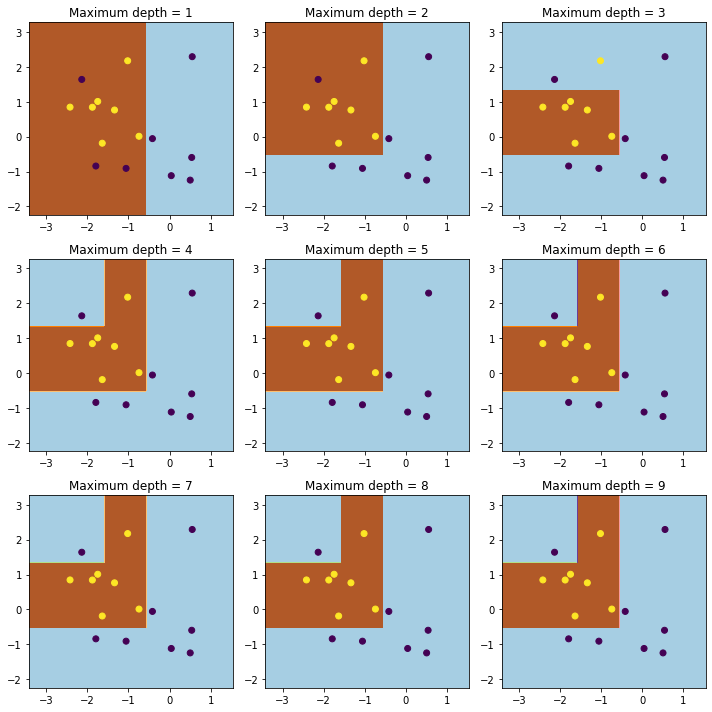

In [34]:
# DT with max depth of 3 and entropy criterion (this is information gain from lectures/tutorials)
fig, ax = plt.subplots(3,3, figsize=(10,10))
for i, ax in enumerate(ax.flat):
    max_depth = i + 1
    model = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=3)
    model.fit(X,y)
    plotter(model, X, y, 'Maximum depth = ' + str(max_depth), ax)
# plt.savefig("figures/boundaries.png")
plt.tight_layout()
plt.show()

In [35]:
# Question b

def my_adaboost_clf(X_train, Y_train, M, weak_clf):
    n_train = len(X_train)
    # Initialize weights
    w = np.ones(n_train) / n_train
    pred_train = np.zeros(n_train)

    for i in range(M):
        # Fit a classifier with the specific weights
        weak_clf.fit(X_train, Y_train, sample_weight = w)
        pred_train_i = weak_clf.predict(X_train)
        # pred_test_i = weak_clf.predict(X_test)

        # Indicator function
        miss = [int(x) for x in (pred_train_i != Y_train)]
        print("weak_clf_%02d train acc: %.4f"
         % (i + 1, 1 - sum(miss) / n_train))

        # Error
        err_m = w @ miss
        # Alpha
        alpha_m = 0.5 * np.log((1 - err_m) / float(err_m))
        # New weights
        miss2 = [x if x == 1 else -1 for x in miss] # -1 * y_i * G(x_i): 1 / -1
        w = np.multiply(w, np.exp([float(x) * alpha_m for x in miss2]))
        w = w / sum(w)

        # Add to prediction
        pred_train_i = [1 if x == 1 else -1 for x in pred_train_i]
        # pred_test_i = [1 if x == 1 else -1 for x in pred_test_i]
        pred_train = pred_train + np.multiply(alpha_m, pred_train_i)
        # pred_test = pred_test + np.multiply(alpha_m, pred_test_i)

    pred_train = (pred_train > 0) * 1
    # pred_test = (pred_test > 0) * 1

    print("My AdaBoost clf train accuracy: %.4f" % (sum(pred_train == Y_train) / n_train))
    # print("My AdaBoost clf test accuracy: %.4f" % (sum(pred_test == Y_test) / n_test))

In [38]:
weak_clf = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=3)

my_adaboost_clf(X, y, 15, weak_clf)

weak_clf_01 train acc: 0.8000
weak_clf_02 train acc: 0.8000
weak_clf_03 train acc: 0.5333
weak_clf_04 train acc: 0.8000
weak_clf_05 train acc: 0.5333
weak_clf_06 train acc: 0.5333
weak_clf_07 train acc: 0.8000
weak_clf_08 train acc: 0.5333
weak_clf_09 train acc: 0.8000
weak_clf_10 train acc: 0.4667
weak_clf_11 train acc: 0.5333
weak_clf_12 train acc: 0.8000
weak_clf_13 train acc: 0.5333
weak_clf_14 train acc: 0.8000
weak_clf_15 train acc: 0.6000
My AdaBoost clf train accuracy: 1.0000
